In [1]:
URL = "https://raw.githubusercontent.com/anhquanbui/finalprojectg7/main/COVID_Parcel_Business.csv"

In [ ]:
import pandas as pd #import pandas
import

In [3]:
df = pd.read_csv(URL) #assign the file to a dataframe
df

,FakeCustomerID,THE_YEAR,THE_WEEK,VOLUME
0,718117,2021,1,8
1,718117,2020,7,257
2,718117,2019,39,141
3,718117,2018,1,14
4,718117,2021,2,192
...,...,...,...,...
190714,228893,2019,13,30
190715,228893,2019,38,122
190716,228893,2019,48,99
190717,228893,2019,20,61


In [4]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190719 entries, 0 to 190718
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   FakeCustomerID  190719 non-null  int64
 1   THE_YEAR        190719 non-null  int64
 2   THE_WEEK        190719 non-null  int64
 3   VOLUME          190719 non-null  int64
dtypes: int64(4)
memory usage: 5.8 MB


In [5]:
unique_ids = df["FakeCustomerID"].unique()

for customer_id in unique_ids:
    customer_data = df[df["FakeCustomerID"] == customer_id]
    print(f"Customer {customer_id} has {len(customer_data)} transactions.")
    


Customer 718117 has 175 transactions.
Customer 317344 has 191 transactions.
Customer 631279 has 196 transactions.
Customer 226167 has 193 transactions.
Customer 285685 has 190 transactions.
Customer 684937 has 166 transactions.
Customer 833033 has 197 transactions.
Customer 451525 has 186 transactions.
Customer 642870 has 197 transactions.
Customer 726326 has 195 transactions.
Customer 188710 has 197 transactions.
Customer 380778 has 177 transactions.
Customer 379351 has 189 transactions.
Customer 786581 has 185 transactions.
Customer 810116 has 193 transactions.
Customer 854872 has 198 transactions.
Customer 551161 has 129 transactions.
Customer 745580 has 197 transactions.
Customer 702005 has 198 transactions.
Customer 450665 has 193 transactions.
Customer 255704 has 193 transactions.
Customer 129828 has 189 transactions.
Customer 395128 has 165 transactions.
Customer 317325 has 120 transactions.
Customer 871319 has 197 transactions.
Customer 638816 has 195 transactions.
Customer 268

In [6]:
for customer_id in df["FakeCustomerID"].unique():
    customer_volume = df[df["FakeCustomerID"] == customer_id]["VOLUME"].sum()
    print(f"Total volumn of customer {customer_id}: {customer_volume}")

Total volumn of customer 718117: 25888
Total volumn of customer 317344: 60132
Total volumn of customer 631279: 9335
Total volumn of customer 226167: 3373
Total volumn of customer 285685: 4020
Total volumn of customer 684937: 4510
Total volumn of customer 833033: 7817
Total volumn of customer 451525: 7134
Total volumn of customer 642870: 5510
Total volumn of customer 726326: 6512
Total volumn of customer 188710: 7847
Total volumn of customer 380778: 13406
Total volumn of customer 379351: 8390
Total volumn of customer 786581: 4555
Total volumn of customer 810116: 18844
Total volumn of customer 854872: 290230
Total volumn of customer 551161: 3471
Total volumn of customer 745580: 8223
Total volumn of customer 702005: 45632
Total volumn of customer 450665: 6497
Total volumn of customer 255704: 20076
Total volumn of customer 129828: 12919
Total volumn of customer 395128: 7078
Total volumn of customer 317325: 3883
Total volumn of customer 871319: 13089
Total volumn of customer 638816: 5923
To

In [7]:
# Count distinct customer
unique_ids = df["FakeCustomerID"].unique()
print("Distinct customers:", len(unique_ids))

Distinct customers: 1061


In [8]:
# Top 20 customer with highest value
top_customers = df.groupby('FakeCustomerID')['VOLUME'].sum().nlargest(20).index
df_top = df[df['FakeCustomerID'].isin(top_customers)]


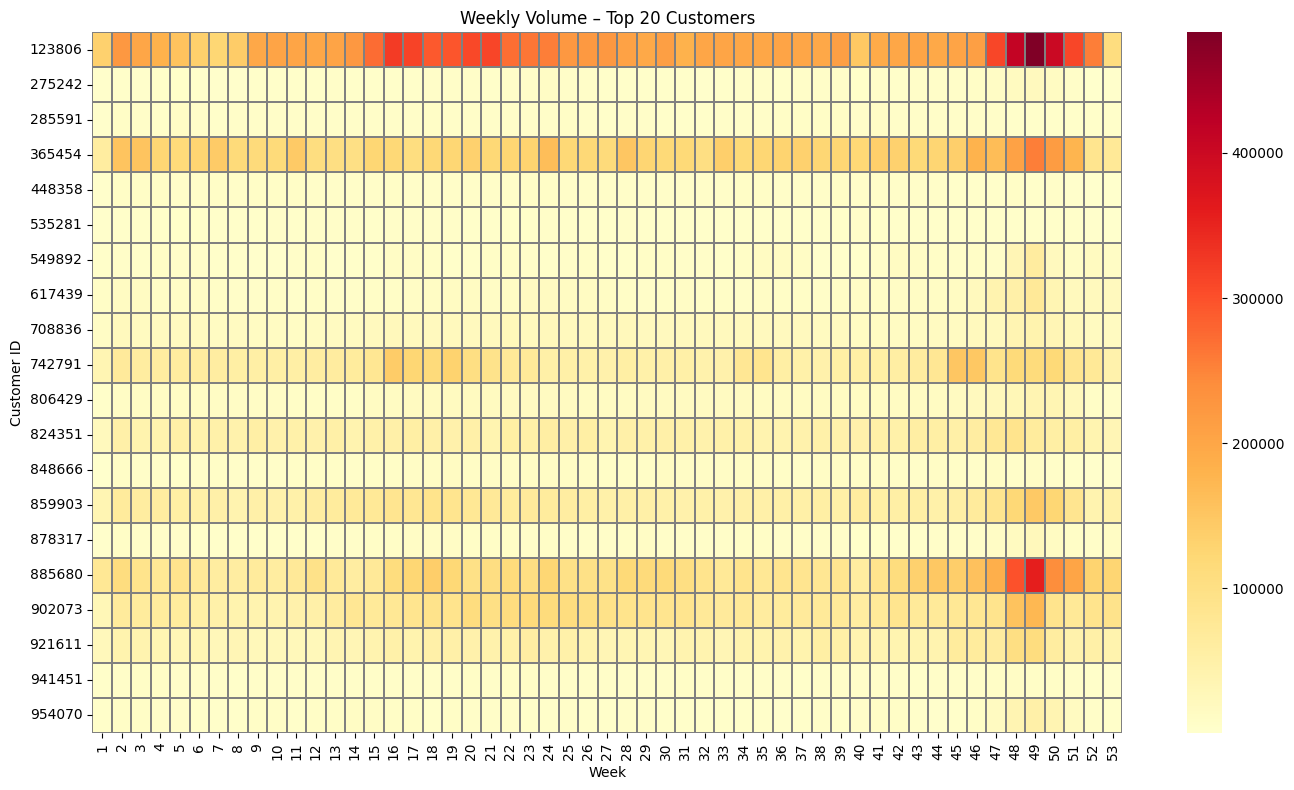

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

heatmap_data = df_top.pivot_table(
    index='FakeCustomerID',
    columns='THE_WEEK',
    values='VOLUME',
    aggfunc='mean'
)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.1, linecolor='gray')
plt.title('Weekly Volume – Top 20 Customers')
plt.xlabel('Week')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.show()


In [11]:
customer_activity = df.groupby("FakeCustomerID")["THE_WEEK"].nunique().sort_values(ascending=False)